In [12]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv('/content/houses_to_rent_v2.csv')
data.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [14]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

In [15]:
# Print the count of missing values for each column
print(missing_values)

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64


In [24]:
# Select a specific feature for outlier analysis
feature_of_interest = 'rent amount (R$)'  # Replace with the actual feature column name

In [18]:
print(data.columns)


Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [25]:
# Extract the feature column
X = data[[feature_of_interest]]

In [26]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X_scaled)
data['isolation_forest_outlier'] = isolation_forest.predict(X_scaled)

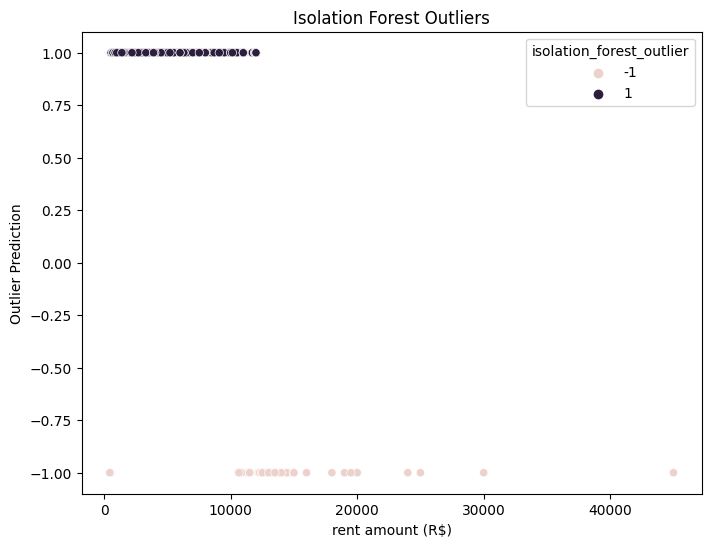

In [28]:
# Visualize the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature_of_interest, y='isolation_forest_outlier', hue='isolation_forest_outlier', data=data)
plt.title('Isolation Forest Outliers')
plt.xlabel(feature_of_interest)
plt.ylabel('Outlier Prediction')
plt.show()